In [ ]:
# PDE, Heat equation using simple derivative operator (differtiation)

In [1]:
from numpy import *
from pylab import *

In [2]:
%pylab

Using matplotlib backend: <object object at 0x7f9fc1bd09f0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/alex/opt/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['power', 'random', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
N = 50
x = linspace(-1, 1, N+1)
xi = linspace(-1, 1, 1000)
u = exp(-10*(x**2))
du2dx2, dudx = u*0, u*0
h = 2/N
dt = 0.5*(h**2)
time = 0

for k in range(10000000):
    time = time + dt
    # if (time > 1.5):
    #     break
    for i in range(1, N):
        du2dx2[i] = (u[i+1] - 2*u[i] + u[i-1])/(h**2)
        dudx[i] = (u[i+1]-u[i-1])/(2*h)
    
    dudx[0] = (u[1]-u[N-1])/(2*h)
    dudx[N] = dudx[0]
    du2dx2[0] = (u[1] - 2*u[0] + u[N-1])/(h**2)
    du2dx2[N] = du2dx2[0]
    
    u = u + dt*(0.1*du2dx2 - dudx)
    u[0]=1; u[N]=1
    
    clf()
    plot(x, u, '-b')
    axis((-1, 1, -1, 1))
    pause(0.000000001)
print("Done!")

In [3]:
def exact(t):
    return 1/t + sqrt(1/(t**2) + 4*t - 4)

def func(u, t):
    return (2*(t**2) - u)/((t**2)*u - t)

def get_euler(N):
    x = linspace(1, 2, N+1)
    h = 1 / N
    w = 2 # initial value
    for i in range(1, N):
        w = w + h * func(u=w, t=x[i])
    return w

def do_experiment(num):
    answer = exact(2)
    result = []
    N, error, euler = [], [], []
    for i in range(num):
        tmp = get_euler(10**i)
        N.append(10**i)
        error.append(abs(answer-tmp))
        euler.append(tmp)
    return N, error, euler



[2, 2.5410222671741445, 2.559670615787481, 2.5613662626570144, 2.56153417444566, 2.5615509491389883, 2.5615526264435267, 2.561552794172349, 2.5615528109466315, 2.5615528126604046]


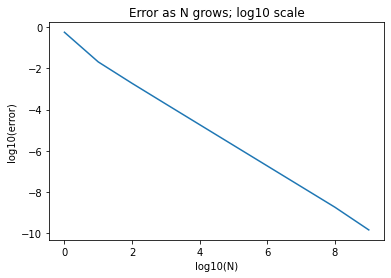

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

N, error, euler = do_experiment(10)
print(euler)
plt.plot(log10(N), log10(error))
plt.xlabel('log10(N)')
plt.ylabel('log10(error)')
plt.title('Error as N grows; log10 scale')
plt.show()

In [7]:
exact(2)

2.5615528128088303